In [15]:
import pandas as pd
penguins = pd.read_csv("penguins.csv")
penguins.fillna(penguins.mean(),inplace = True)
penguins.head()

/var/folders/kf/328rspbj28ddhj5qdcbqkdpw0000gn/T/ipykernel_24329/2574295064.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins.fillna(penguins.mean(),inplace = True)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


Text(0.5, 1.0, 'Body mass as a function of Flipper length')

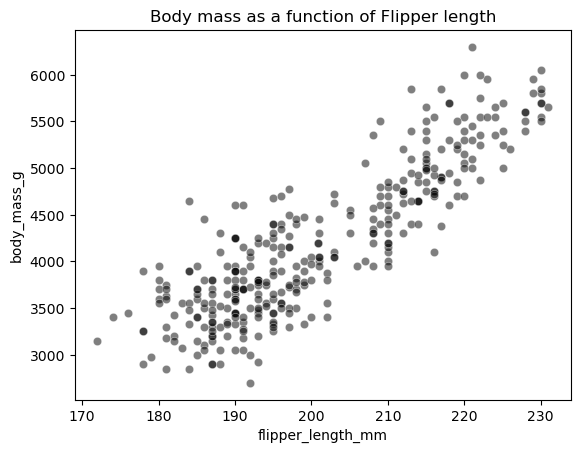

In [16]:
import seaborn as sns
feature_name = "flipper_length_mm"
target_name = "body_mass_g"
data, target = penguins[[feature_name]], penguins[target_name]
ax = sns.scatterplot(
    data= penguins, x = feature_name, y = target_name, color = "black", alpha = 0.5
)
ax.set_title("Body mass as a function of Flipper length")

In [17]:
def linear_model_flipper_mass(flipper_length, weight_flipper_length, intercept_body_mass):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

### Without Scikit Learn's LinearRegression Module

In [18]:
import numpy as np
# slope
weight_flipper_length = 45
# intercept
intercept_body_mass = -5000
# range of x (feature)
flipper_length_range= np.linspace(data.min(), data.max(),num = 300)
# list of y (predictions) for respective x (features)
predicted_body_mass = linear_model_flipper_mass(flipper_length_range, weight_flipper_length, intercept_body_mass)


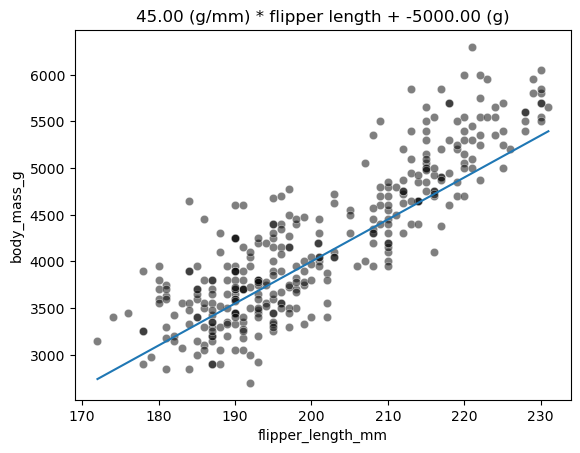

In [19]:
label = "{0:.2f} (g/mm) * flipper length + {1:.2f} (g)"
# plots the scatter plot 
ax = sns.scatterplot(data=penguins, x = feature_name, y = target_name, color = "black", alpha = 0.5)
# plots the linear graph
ax.plot(flipper_length_range, predicted_body_mass)
# sets the title
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

### Using Scikit Learn's LinearRegression Module

In [20]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
# fits the linear regression model using features and labels,i.e., determines the weights and the bias
linear_regression.fit(data,target )


LinearRegression()

In [21]:

# parameter value .....weight .... weight per unit flipper length
weight_flipper_length = linear_regression.coef_[0]
# intercept value ..... bias  .... intercept body mass
intercept_body_mass = linear_regression.intercept_

print(weight_flipper_length, '\n', intercept_body_mass)


49.685566406100065 
 -5780.831358077059


Text(0.5, 1.0, 'Model using LinearRegression from Scikit-learn')

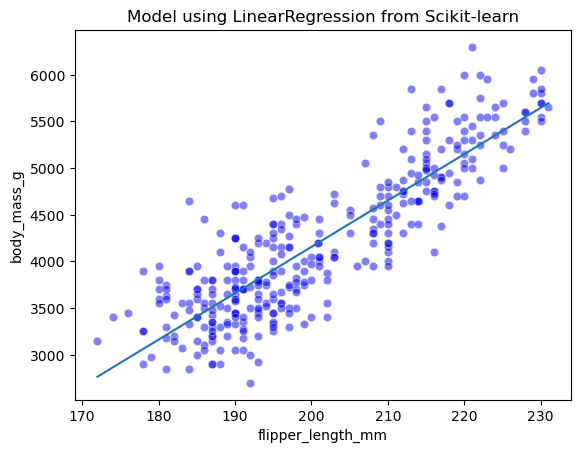

In [33]:
flipper_length_range = np.linspace(data.min(), data.max(), num = 300)
predicted_body_mass = (weight_flipper_length* flipper_length_range + intercept_body_mass)   # f(x) = w * x  +  b
ax = sns.scatterplot(x = data[feature_name], y = target, color = "blue", alpha = 0.5)
ax.plot(flipper_length_range, predicted_body_mass)
ax.set_title("Model using LinearRegression from Scikit-learn")


### Mean Squared Error

In [35]:
from sklearn.metrics import mean_squared_error
inferred_body_mass = linear_regression.predict(data)    #  y hat = f(data) = w * data   +  b
model_error = mean_squared_error(target, inferred_body_mass) # (y - y hat)^2
print(f"The mean squarred error of the optimal model is {model_error:.2f}")


The mean squarred error of the optimal model is 153647.66


### Mean Absolute Error

In [36]:
from sklearn.metrics import mean_absolute_error
model_error_absolute = mean_absolute_error(target, inferred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error_absolute:.2f}")

The mean absolute error of the optimal model is 311.18
